In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, curvedsky, tools_lens, tools_delens, tools_multitracer
from matplotlib.pyplot import *

In [2]:
snmin, snmax = 1, 100
olmax = 1024
klist = ['TT','TE','EE','EB']

In [3]:
d = prjlib.data_directory()
dobj = {}
for ntype in ['base','goal']:
    p = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=snmin,snmax=snmax,ntype=ntype+'_roll50')
    pE = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=ntype+'_roll50')
    qobj = tools_lens.init_qobj(p.stag,'False',rlmin=300,rlmax=4096)
    mobj = tools_multitracer.mass_tracer(p,qobj,add_cmb=['TT','TE','EE','EB'])
    dobj[ntype] = tools_delens.init_template(p.stag+qobj.ltag,mobj.klist,pE.stag,False,klist=klist,kfltr='none',elmin=50)
    print(dobj[ntype].frho)

{'TT': 0, 'TE': 1, 'EE': 2, 'EB': 3, 'g0': 4, 'g1': 5, 'g2': 6, 'g3': 7, 'g4': 8, 'g5': 9, 'cib': 10}
/project/projectdirs/sobs/delensing/delensb/aps/rho_TT-TE-EE-EB_le50-2048_lk20-2048_none_lacom_base_roll50_mv3_a5.0deg_none_l300-4096_TT-TE-EE-EB-g0-g1-g2-g3-g4-g5-cib_cocom_base_roll50_cinv
{'TT': 0, 'TE': 1, 'EE': 2, 'EB': 3, 'g0': 4, 'g1': 5, 'g2': 6, 'g3': 7, 'g4': 8, 'g5': 9, 'cib': 10}
/project/projectdirs/sobs/delensing/delensb/aps/rho_TT-TE-EE-EB_le50-2048_lk20-2048_none_lacom_goal_roll50_mv3_a5.0deg_none_l300-4096_TT-TE-EE-EB-g0-g1-g2-g3-g4-g5-cib_cocom_goal_roll50_cinv


In [12]:
r = {}
#for ntype in ['base','goal']:
for ntype in ['goal']:
    #r[ntype] = 0
    #for i in range(snmin,snmax+1):
    #    BB, TT, BT = np.loadtxt(dobj[ntype].cl[klist[0]][i],unpack=True)
    #    r[ntype] += BT**2/BB/TT/(snmax-snmin+1)
    #for i in range(snmin,snmax+1):
    L, bb, r[ntype] = (np.loadtxt(dobj[ntype].frho)).T

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


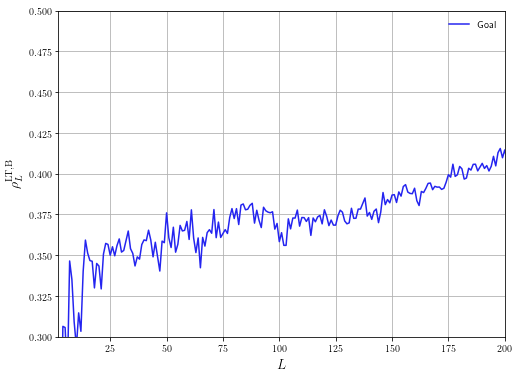

In [14]:
#pl.plot_1dstyle(usetex=True,fsize=[8,6],xmin=2,xmax=200,ymin=.5,ymax=.7,grid=True,ylab=r'$\rho_L^{\rm LT,B}$')
pl.plot_1dstyle(usetex=True,fsize=[8,6],xmin=2,xmax=200,ymin=.3,ymax=.5,grid=True,ylab=r'$\rho_L^{\rm LT,B}$')
#plot(r['base'],label='Baseline')
plot(L,r['goal']/bb,label='Goal')
legend(loc=0)
#savefig('fig_BB_correlation.pdf')